In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']

In [2]:
import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
### notebook specific configuration ###
from os.path import basename
#mpl.style.use('ggplot')
mpl.style.use('fivethirtyeight')
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 13)


In [6]:
bed_f = read_bed_file("Results/output/TSS1.exp.bed")
meta_f = pd.read_csv("Results/output/TSS1.exp.meta",sep="\t", index_col=0)

In [7]:
meta_f

,Tissues,cs,CHO ATAC Region,ID,Gene,Gene ID,Transcript,Is Experimental
p1@Bmp4_XM_027386529.1,"Spleen,MiscOrgans,FemaleReproductive,Brain,Lun...",0b11,NaN,348823,Bmp4,NaN,XM_027386529.1,1.0
p2@Bmp4_XM_027386529.1,"Spleen,MiscOrgans,FemaleReproductive,Brain,Lun...",0b00,NaN,90264,Bmp4,NaN,XM_027386529.1,1.0
p3@Bmp4_XM_027386529.1,"Spleen,MiscOrgans,FemaleReproductive,Brain,Lun...",0b00,NaN,181215,Bmp4,NaN,XM_027386529.1,1.0
p1@Bmp4_XM_027386528.1,"Heart,Spleen,MiscOrgans,FemaleReproductive,Bra...",0b11,NaN,308710,Bmp4,NaN,XM_027386528.1,1.0
p1@Cdkn3_XM_027386531.1,"BMDMwt,Spleen,MiscOrgans,FemaleReproductive,CH...",0b11,NaN,237253,Cdkn3,NaN,XM_027386531.1,1.0
p1@Cnih1_XM_027386534.1,"Heart,BMDMwt,Spleen,MiscOrgans,FemaleReproduct...",0b11,NaN,298307,Cnih1,NaN,XM_027386534.1,1.0
p1@Cgrrf1_XM_027386536.1,"Heart,Spleen,MiscOrgans,FemaleReproductive,CHO...",0b11,NaN,348288,Cgrrf1,NaN,XM_027386536.1,1.0
p1@Samd4a_XM_027386537.1,"Heart,Spleen,MiscOrgans,FemaleReproductive,Bra...",0b11,NaN,342596,Samd4a,NaN,XM_027386537.1,1.0
p1@Samd4a_XM_027386539.1,"MiscOrgans,FemaleReproductive,Muscle",0b11,NaN,509869,Samd4a,NaN,XM_027386539.1,1.0
p2@Samd4a_XM_027386539.1,"MiscOrgans,FemaleReproductive,Muscle",0b00,NaN,334958,Samd4a,NaN,XM_027386539.1,1.0


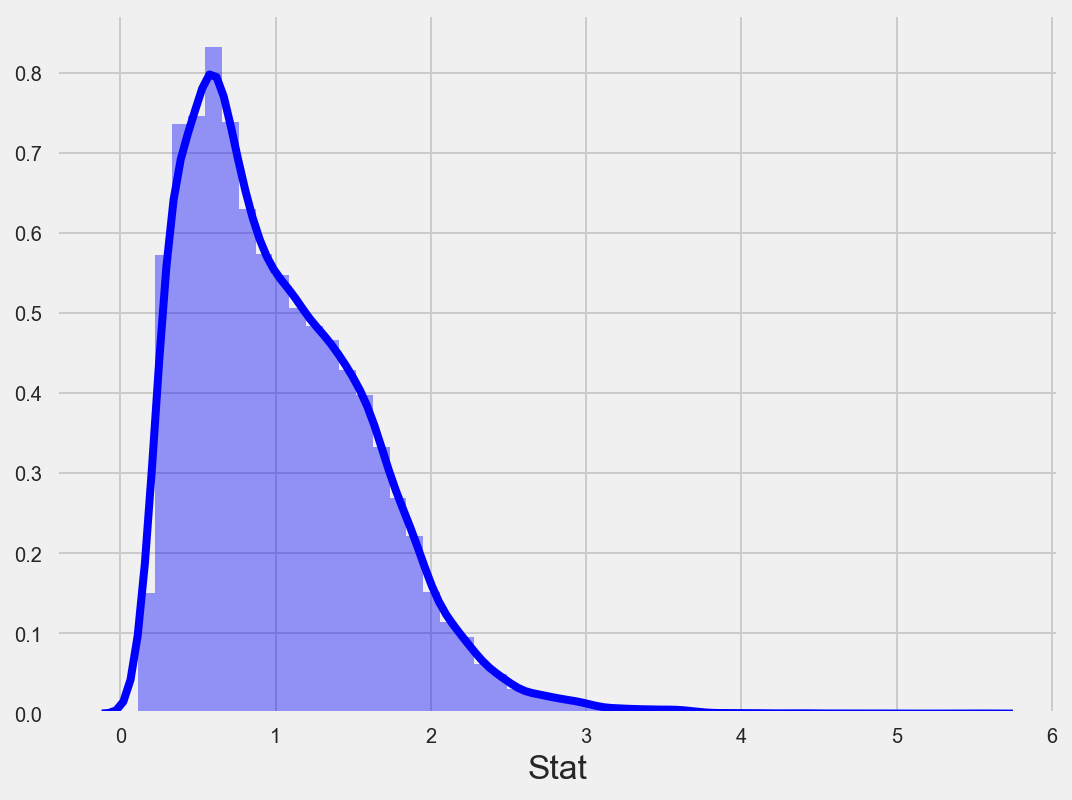

In [9]:
sns.distplot(bed_f["Stat"])

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/isshamie/software/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


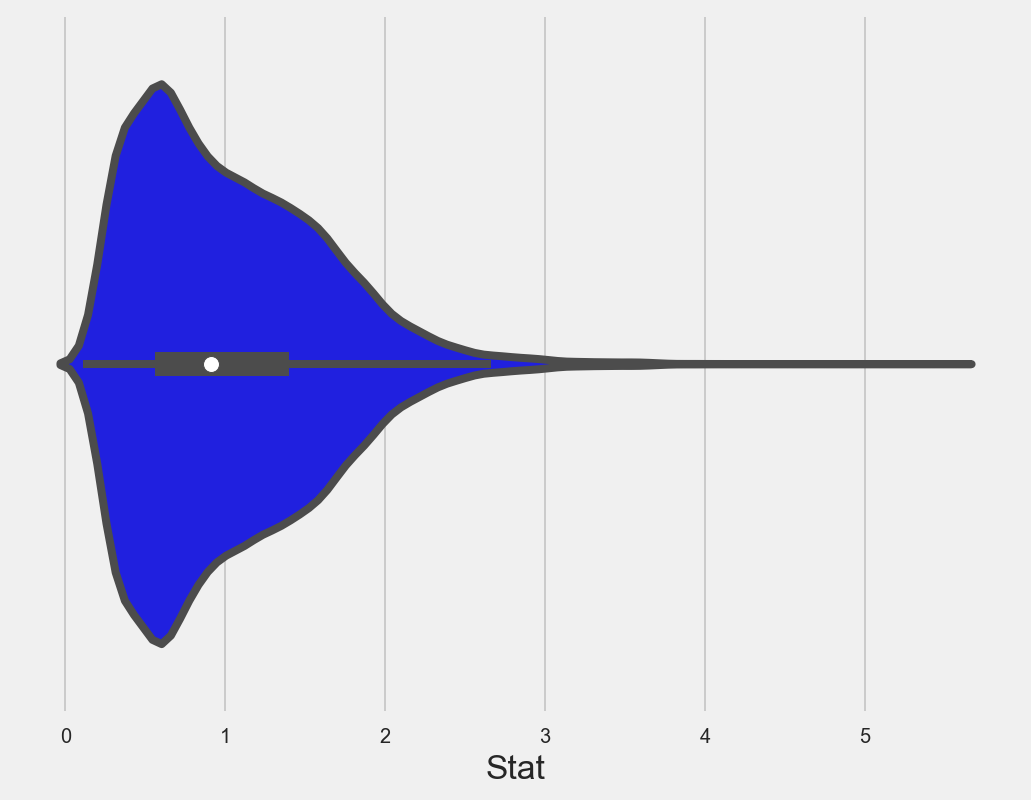

In [12]:
sns.violinplot(bed_f["Stat"])

In [11]:
print(min(bed_f["Stat"]))
print(max(bed_f["Stat"]))

0.114277296562
5.51605520323
